In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_iris, make_blobs
from sklearn.metrics import adjusted_rand_score, silhouette_score

**Esercizio 4.4.1**

Carichiamo il dataset

In [2]:
iris = load_iris(as_frame=True)
data = iris.data
targets = iris.target

Creiamo l'insieme di campioni, ed addestriamo un algoritmo di clustering. Utilizziamo Seaborn per visualizzare i valori.

Text(0.5, 0.98, 'Label veri')

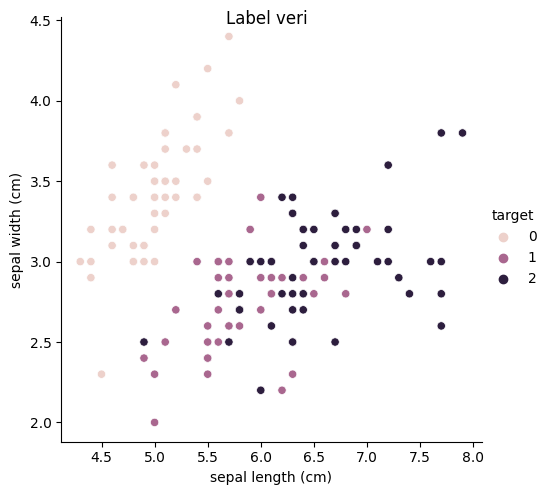

In [3]:
X = data.loc[:, ('sepal length (cm)', 'sepal width (cm)')].values
N_CLUSTERS = 3
kmeans = KMeans(n_clusters=N_CLUSTERS, n_init='auto')
kmeans.fit(X)
labels = sns.relplot(
    data=data,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue=targets)
labels.fig.suptitle('Label veri')

Effettuiamo una predizione e plottiamo a schermo i label predetti dal clustering.

Text(0.5, 0.98, 'Label predetti dal clustering')

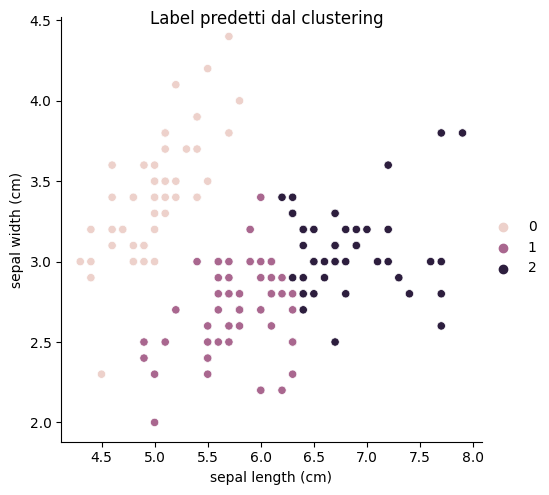

In [4]:
y_pred = kmeans.predict(X)
predictions = sns.relplot(
    data=data,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue=y_pred)
predictions.fig.suptitle('Label predetti dal clustering')

**Esercizio 4.4.2**

Otteniamo le distanze richieste dall'esercizio. 

In [5]:
X_dist = kmeans.transform(X)

Definiamo la funzione `get_magnitudes_cardinalities` per ottenere la magnitudine e la cardinalità dei cluster.

In [6]:

# Funzione per calcolare magnitudine e cardinalità
def get_magnitudes_cardinalities(dists):
    clusters = np.argmin(dists, axis=1)
    distances = np.amin(dists, axis=1)
    dists_cens = list(zip(clusters, distances))
    magnitudes = np.zeros(len(set(clusters)))
    cardinalities = np.zeros(len(set(clusters)))
    for dc in dists_cens:
        magnitudes[dc[0]] += dc[1]
        cardinalities[dc[0]] += 1
    return magnitudes, cardinalities

Plottiamo i valori ottenuti sotto forma di istogrammi.

Text(0.5, 1.0, 'Cardinalities')

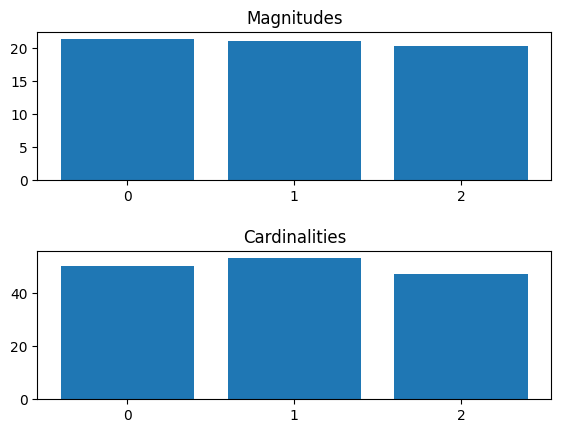

In [7]:
# Plotto magnitudine e cardinalità
m, c = get_magnitudes_cardinalities(X_dist)
cls_tags = list(range(N_CLUSTERS))
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.tight_layout(pad=3.0)
ax1.bar(cls_tags, m)
ax1.set_xticks([0, 1, 2])
ax1.set_title('Magnitudes')
ax2.bar(cls_tags, c)
ax2.set_xticks([0, 1, 2])
ax2.set_title('Cardinalities')

**Esercizio 4.4.3**

Definiamo delle funzioni che ci permettano di ottenere il valore ottimale di cluster.

In [8]:
# Esercizio E20.3
def fit_get_magnitude(values, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
    kmeans.fit(values)
    m, _ = get_magnitudes_cardinalities(kmeans.transform(values))
    return m.sum()

def get_k_magnitudes(values, min_clusters, max_clusters):
    clusters_values = list(range(min_clusters, max_clusters+1))
    magnitudes = [
        fit_get_magnitude(values, n_clusters) \
        for n_clusters in clusters_values]
    return magnitudes, clusters_values

Vediamo a schermo come varia la magnitudine al variare del numero di cluster.

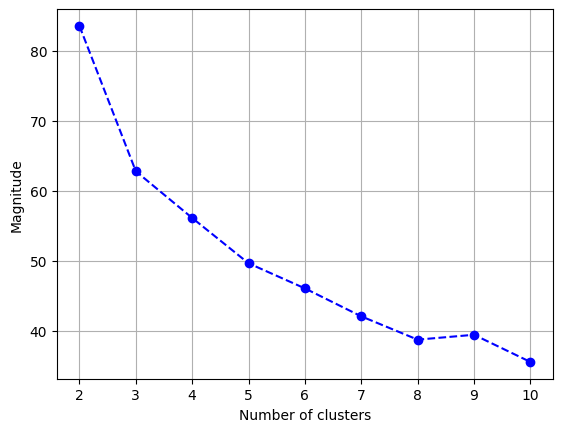

In [9]:
ms, cvals = get_k_magnitudes(X, 2, 10)

plt.plot(cvals, ms, '--bo')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Magnitude')
plt.show()

**Esercizio 4.4.4**

Definiamo due funzioni: la prima che ci permette di descrivere i risultati ottenuti dal K-Means, e la seconda che ci permette di descrivere i risultati ottenuti dal DBSCAN.

In [10]:
def print_kmeans_results(X, y, use_case, verbose=False):
    print(f'{use_case} - KMeans')
    n_clusters_ari_best = 2
    n_clusters_silhouette_best = 2
    ari_best = 0
    silhouette_best = 0
    for n_clusters in range(2, 6):
        kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
        preds = kmeans.fit_predict(X)
        ari = round(adjusted_rand_score(y, preds), 2)
        silhouette = round(silhouette_score(X, preds), 2)
        if verbose:
            print(f'Numero di cluster: {n_clusters}')
            print(f'ARI KMeans: {ari}')
            print(f'Silhouette score KMeans: {silhouette}')
        if ari > ari_best:
            ari_best = ari
            n_clusters_ari_best = n_clusters
        if silhouette > silhouette_best:
            silhouette_best = silhouette
            n_clusters_silhouette_best = n_clusters
    print(
        f'''Parametri con il valore massimo di ARI:
        num clusters: {n_clusters_ari_best}
        Valore massimo di ARI: {ari_best}''')
    print(
        f'''Parametri con il valore massimo di silhouette:
        num clusters: {n_clusters_silhouette_best}
        Valore massimo di silhouette: {silhouette_best}''')


def print_dbscan_results(X, y, use_case, verbose=False):
    print(f'{use_case} - DBSCAN')
    eps_mins_ari_best = [0, 0]
    eps_mins_silhouette_best = [0, 0]
    ari_best = 0
    silhouette_best = 0
    for epsilon in [0.5, 1.0]:
        for min_samples in [5, 10]:
            dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
            preds = dbscan.fit_predict(X)
            ari = round(adjusted_rand_score(y, preds), 2)
            silhouette = round(silhouette_score(X, preds), 2)
            if verbose:
                print(f'Epsilon: {epsilon} - Min samples: {min_samples}')
                print(f'ARI KMeans: {ari}')
                print(f'Silhouette score KMeans: {silhouette}')
            if ari > ari_best:
                ari_best = ari
                eps_mins_ari_best = [epsilon, min_samples]
            if silhouette > silhouette_best:
                silhouette_best = silhouette
                eps_mins_silhouette_best = [epsilon, min_samples]
    print(
        f'''Parametri con il valore massimo di ARI:
        eps: {eps_mins_ari_best[0]} - min samples: {eps_mins_ari_best[1]}
        Valore massimo di ARI: {ari_best}''')
    print(
        f'''Parametri con il valore massimo di silhouette score:
        eps: {eps_mins_silhouette_best[0]} - min samples: {eps_mins_silhouette_best[1]}
        Valore massimo di silhouette: {silhouette_best}''')

In [11]:
X, y = make_blobs(n_samples=1000, random_state=42)

print_kmeans_results(X, y, 'Cluster corretti')
print_dbscan_results(X, y, 'Cluster corretti')

Cluster corretti - KMeans
Parametri con il valore massimo di ARI:
        num clusters: 3
        Valore massimo di ARI: 1.0
Parametri con il valore massimo di silhouette:
        num clusters: 3
        Valore massimo di silhouette: 0.84
Cluster corretti - DBSCAN
Parametri con il valore massimo di ARI:
        eps: 1.0 - min samples: 5
        Valore massimo di ARI: 0.99
Parametri con il valore massimo di silhouette score:
        eps: 1.0 - min samples: 5
        Valore massimo di silhouette: 0.82


In [12]:
# Ipotesi 1: anisotropia
t = np.tan(np.radians(60))
rot = np.array([[1, t], [0, 1]])
X_an = X.dot(rot)

print_kmeans_results(X_an, y, 'Cluster anisotropi')
print_dbscan_results(X_an, y, 'Cluster anisotropi')

Cluster anisotropi - KMeans
Parametri con il valore massimo di ARI:
        num clusters: 3
        Valore massimo di ARI: 0.99
Parametri con il valore massimo di silhouette:
        num clusters: 2
        Valore massimo di silhouette: 0.82
Cluster anisotropi - DBSCAN
Parametri con il valore massimo di ARI:
        eps: 1.0 - min samples: 5
        Valore massimo di ARI: 1.0
Parametri con il valore massimo di silhouette score:
        eps: 1.0 - min samples: 5
        Valore massimo di silhouette: 0.74


In [13]:
# Ipotesi 2: diversa varianza
X_var, y_var = make_blobs(
    n_samples=1000,
    random_state=200,
    cluster_std=[1.8, 2.5, 2.4])

print_kmeans_results(X_var, y_var, 'Cluster a diversa varianza')
print_dbscan_results(X_var, y_var, 'Cluster a diversa varianza')

Cluster a diversa varianza - KMeans
Parametri con il valore massimo di ARI:
        num clusters: 3
        Valore massimo di ARI: 0.74
Parametri con il valore massimo di silhouette:
        num clusters: 3
        Valore massimo di silhouette: 0.49
Cluster a diversa varianza - DBSCAN
Parametri con il valore massimo di ARI:
        eps: 0.5 - min samples: 5
        Valore massimo di ARI: 0.32
Parametri con il valore massimo di silhouette score:
        eps: 1.0 - min samples: 5
        Valore massimo di silhouette: 0.31


In [14]:
# Ipotesi 3: diversa cardinalità
X, y = make_blobs(n_samples=1000, random_state=12)
X_uneven = np.concatenate(
    (X[y == 0][:200], X[y == 1][:50], X[y == 2][:10]),
    axis=0)
y_uneven = np.concatenate(
    (y[y == 0][:200], y[y == 1][:50], y[y == 2][:10]),
    axis=0)

print_kmeans_results(X_var, y_var, 'Cluster a diversa cardinalità')
print_dbscan_results(X_var, y_var, 'Cluster a diversa cardinalità')

Cluster a diversa cardinalità - KMeans
Parametri con il valore massimo di ARI:
        num clusters: 3
        Valore massimo di ARI: 0.74
Parametri con il valore massimo di silhouette:
        num clusters: 3
        Valore massimo di silhouette: 0.49
Cluster a diversa cardinalità - DBSCAN
Parametri con il valore massimo di ARI:
        eps: 0.5 - min samples: 5
        Valore massimo di ARI: 0.32
Parametri con il valore massimo di silhouette score:
        eps: 1.0 - min samples: 5
        Valore massimo di silhouette: 0.31
